In [3]:
!pip install pandas
!pip install ISLP
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
from matplotlib.pyplot import subplots
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize ,
poly)


In [4]:
auto = pd.read_csv(r"C:\Users\eris-\Downloads\Auto.csv")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
X = pd.DataFrame({'intercept': np.ones(auto.shape[0]),
'horsepower': auto['horsepower']})

In [6]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [7]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')  # Convert to numeric
auto['horsepower'].fillna(auto['horsepower'].mean(), inplace=True) # replacing missing values with mean
auto = sm.add_constant(auto) #creating constant for intercept
X = auto[['const', 'horsepower']] #Defining X
y = auto['mpg'] #Defining y
model = sm.OLS(y, X) #fitting model
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     580.6
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.45e-79
Time:                        19:33:53   Log-Likelihood:                -1200.1
No. Observations:                 397   AIC:                             2404.
Df Residuals:                     395   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0058      0.729     54.903      0.0

I had conducted this same regression using R, with the outcome being comparable. There is a negative coefficient associated with horsepower, which is significant indicated by a low p value. The relationship is significant, though the coefficient isnt exactly large. 

iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?

In [8]:
# Assuming 'results' is your fitted regression model
prediction = results.get_prediction([1, 98])  # Assuming 1 is the constant and 150 is the 'horsepower' value
# Extract the predicted value
predicted_value = prediction.predicted_mean[0]
print(predicted_value)
confidence_interval = prediction.conf_int()
print(confidence_interval)

24.537027802797724
[[24.03806693 25.03598868]]


(b) Plot the response and the predictor in a new set of axes ax. Use
the ax.axline() method or the abline() function defined in the
lab to display the least squares regression line.

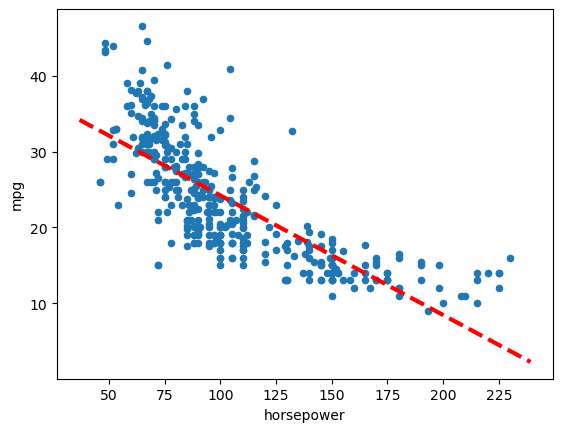

In [9]:
# defining abline
def abline(ax, b, m, *args , **kwargs):
 xlim = ax.get_xlim()
 ylim = [m * xlim[0] + b, m * xlim[1] + b]
 ax.plot(xlim , ylim , *args , **kwargs)

#plotting horsepower v mpg
ax = auto.plot.scatter('horsepower', 'mpg')
abline(ax,
results.params[0],
results.params[1],
'r--',
linewidth=3)

(c) Produce some of diagnostic plots of the least squares regression
fit as described in the lab. Comment on any problems you see
with the fit.

116

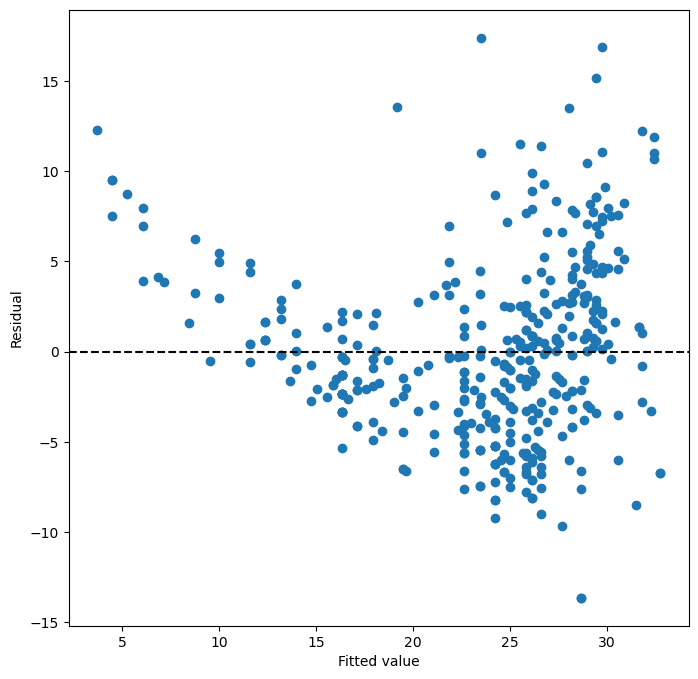

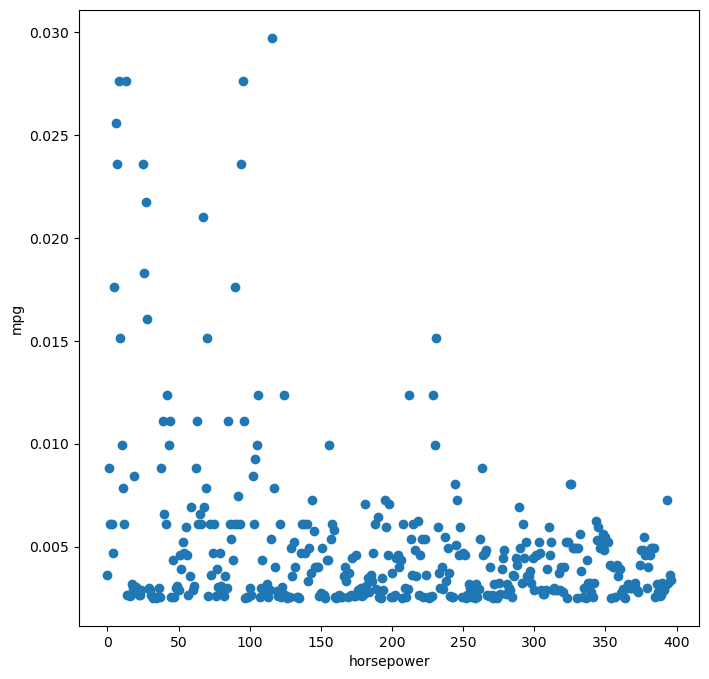

In [10]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')
np.argmax(infl.hat_matrix_diag)

The U shape in the data indicates that the relationship between the variables is non-linear. 

9. This question involves the use of multiple linear regression on the
Auto data set.
(a) Produce a scatterplot matrix which includes all of the variables
in the data set.

C:\Users\eris-\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\eris-\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\eris-\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\eris-\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:116: RuntimeWarning: invalid value encountered in divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])
posx and posy should be finite values
posx and posy should be finite values


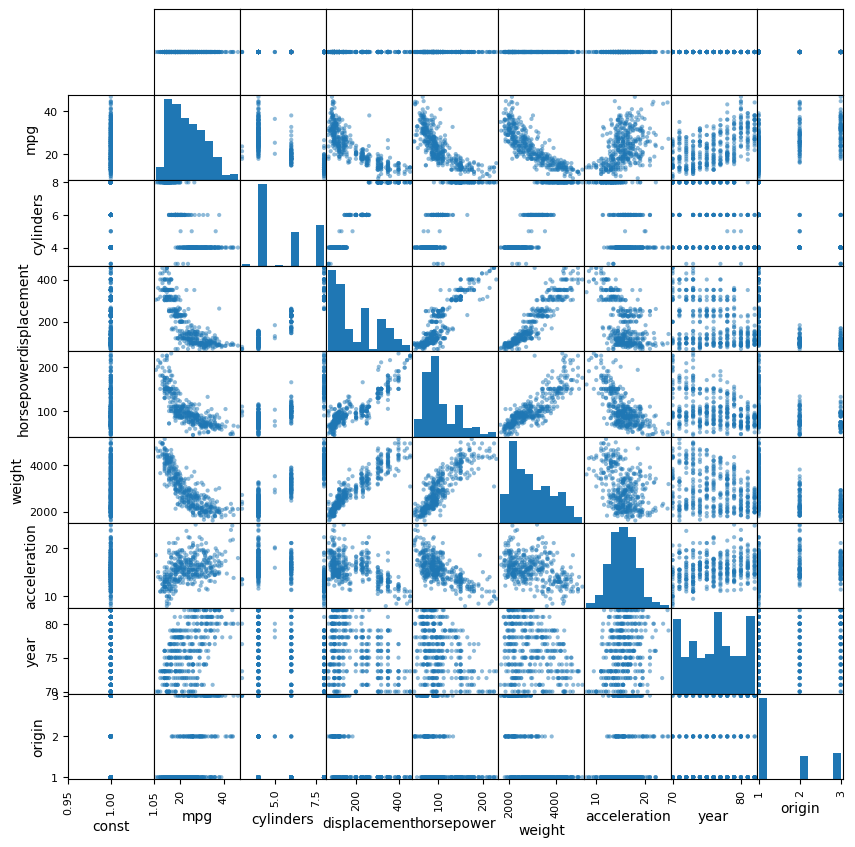

In [11]:
scatter_matrix(auto, figsize=(10, 10))
plt.show()

In [12]:
auto.corr()

C:\Users\eris-\AppData\Local\Temp\ipykernel_19436\668445388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto.corr()


,const,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mpg,NaN,1.000000,-0.776260,-0.804443,-0.771441,-0.831739,0.422297,0.581469,0.563698
cylinders,NaN,-0.776260,1.000000,0.950920,0.839715,0.897017,-0.504061,-0.346717,-0.564972
displacement,NaN,-0.804443,0.950920,1.000000,0.893833,0.933104,-0.544162,-0.369804,-0.610664
horsepower,NaN,-0.771441,0.839715,0.893833,1.000000,0.860581,-0.687039,-0.413022,-0.453962
weight,NaN,-0.831739,0.897017,0.933104,0.860581,1.000000,-0.419502,-0.307900,-0.581265
acceleration,NaN,0.422297,-0.504061,-0.544162,-0.687039,-0.419502,1.000000,0.282901,0.210084
year,NaN,0.581469,-0.346717,-0.369804,-0.413022,-0.307900,0.282901,1.000000,0.184314
origin,NaN,0.563698,-0.564972,-0.610664,-0.453962,-0.581265,0.210084,0.184314,1.000000


FIX THIS WITH MODEL SPEC

In [13]:
X = MS(['const', 'horsepower', 'displacement', 'cylinders', 'acceleration', 'origin', 'year', 'weight']).fit_transform(auto) #Defining X
y = auto['mpg'] #Defining y
model = sm.OLS(y, X) #fitting model
results1 = model.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 22 May 2024   Prob (F-statistic):          2.41e-141
Time:                        19:34:02   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -9.3558      2.304     -4.060   

In [14]:
anova_lm(results, results1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,395.0,9819.232428,0.0,NaN,NaN,NaN
1,389.0,4325.960856,6.0,5493.271572,82.327862,3.479096e-66


It looks like based on this, predictors displacement, origin, year, weight.

116

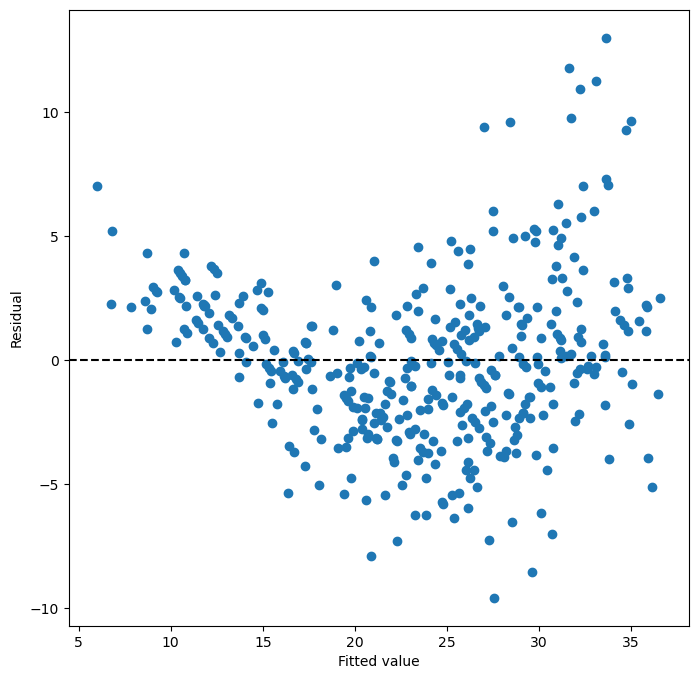

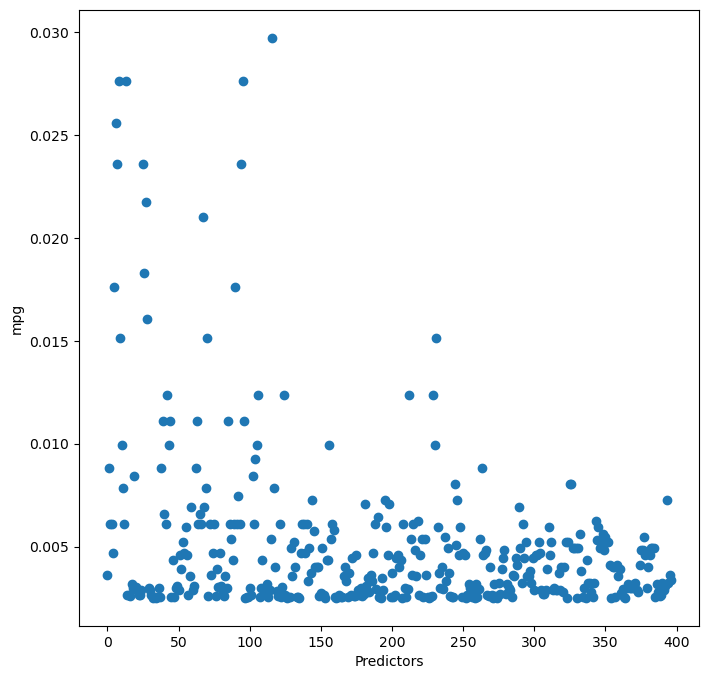

In [15]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results1.fittedvalues , results1.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Predictors')
ax.set_ylabel('mpg')
np.argmax(infl.hat_matrix_diag)

In [16]:
X = MS(['const', 'horsepower', 'acceleration', ('acceleration', 'horsepower'), 'displacement']).fit_transform(auto)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,13.1527,1.663,7.911,0.0
const,13.1527,1.663,7.911,0.0
horsepower,0.1268,0.029,4.382,0.0
acceleration,1.0281,0.201,5.103,0.0
acceleration:horsepower,-0.0156,0.002,-8.277,0.0
displacement,-0.0407,0.005,-8.867,0.0


In [17]:
X = MS([poly('horsepower', degree=2), 'acceleration']).fit_transform(auto)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,34.8973,1.697,20.563,0.0
"poly(horsepower, degree=2)[0]",-147.6465,5.896,-25.040,0.0
"poly(horsepower, degree=2)[1]",46.5355,4.303,10.814,0.0
acceleration,-0.7317,0.108,-6.761,0.0


(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [18]:
Carseats = load_data('Carseats')

In [19]:
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [20]:
X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
y = Carseats['Sales']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.39e-23
Time:                        19:34:04   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.0

(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

Output suggests that for every unit increase in price, sales decreases by .05. It also suggests that for urban yes there is a decrease in sales by .02, and an increase of 1.2 for US Yes. 

(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.

-See R version

(d) For which of the predictors can you reject the null hypothesis
H0 : #j = 0?

Price and US (yes)

(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

In [21]:
X = MS(['Price', 'US']).fit_transform(Carseats)
y = Carseats['Sales']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.66e-24
Time:                        19:34:04   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.0

(f) How well do the models in (a) and (e) fit the data?

Model e fits slightly better

(g) Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).

In [22]:
confidence_interval = results.conf_int()
print(confidence_interval)

                  0          1
intercept  11.79032  14.271265
Price      -0.06476  -0.044195
US[Yes]     0.69152   1.707766


(h) Is there evidence of outliers or high leverage observations in the
model from (e)?

In [23]:
residuals = results.resid
mean_resid = np.mean(residuals)
std_resid = np.std(residuals)
threshold = 2+std_resid
outliers = np.abs(residuals) > threshold
outlier_indices = np.where(outliers)[0]
print(outlier_indices)

[ 17  25  28  30  34  44  49  50  57  62  68  82  83  98 106 143 209 232
 258 297 298 304 316 328 352 376 384 395]


Using this threshold, it appears there are outliers. 

11. In this problem we will investigate the t-statistic for the null hypothesis
H0 : # = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.

In [24]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

auto = sm.add_constant(auto)

(a) Perform a simple linear regression of y onto x, without an intercept.
Report the coefficient estimate ˆ #, the standard error of
this coefficient estimate, and the t-statistic and p-value associated
with the null hypothesis H0 : # = 0. Comment on these
results. (You can perform regression without an intercept using
the keywords argument intercept=False to ModelSpec().)

In [25]:
modelyx = sm.OLS(y, x)
resultsyx = modelyx.fit()
summarize(resultsyx)
print(resultsyx.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Wed, 22 May 2024   Prob (F-statistic):                    6.23e-31
Time:                        19:34:04   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

It looks like the output from this model shows the coeff - 1.9, the standard error to be .1, the t value to be 16.8, and a significant p value. This is evidence to reject the null

(b) Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H0 : # = 0. Comment on these results.

In [26]:
modelxy = sm.OLS(x, y)
resultsxy = modelxy.fit()
summarize(resultsxy)
print(resultsxy.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Wed, 22 May 2024   Prob (F-statistic):                    6.23e-31
Time:                        19:34:04   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The output from this indicates a coefficient of .3, lower standard error, same t value, significant p value

(c) What is the relationship between the results obtained in (a) and
(b)?

(e) Using the results from (d), argue that the t-statistic for the regression
of y onto x is the same as the t-statistic for the regression
of x onto y.

See r version

(f) In R, show that when regression is performed with an intercept,
the t-statistic for H0 : #1 = 0 is the same for the regression of y
onto x as it is for the regression of x onto y.

See r version

12. This problem involves simple linear regression without an intercept.
(a) Recall that the coefficient estimate ˆ # for the linear regression of
Y onto X without an intercept is given by (3.38). Under what
circumstance is the coefficient estimate for the regression of X
onto Y the same as the coefficient estimate for the regression of
Y onto X?

See r version


(b) Generate an example in Python with n = 100 observations in
which the coefficient estimate for the regression of X onto Y
is different from the coefficient estimate for the regression of Y
onto X.

In [27]:
rng = np.random.default_rng(1)
x = rng.normal(loc=10, scale=10, size=100)
y = 2 * x + rng.normal(loc=10, scale = 20, size=100)

In [28]:
modelxy1 = sm.OLS(x, y)
resultsxy1 = modelxy1.fit()
summarize(resultsxy1)
print(resultsxy1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.691
Model:                            OLS   Adj. R-squared (uncentered):              0.688
Method:                 Least Squares   F-statistic:                              221.7
Date:                Wed, 22 May 2024   Prob (F-statistic):                    5.17e-27
Time:                        19:34:10   Log-Likelihood:                         -336.36
No. Observations:                 100   AIC:                                      674.7
Df Residuals:                      99   BIC:                                      677.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
modelyx1 = sm.OLS(x, y)
resultsyx1 = modelyx1.fit()
summarize(resultsyx1)
print(resultsyx1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.691
Model:                            OLS   Adj. R-squared (uncentered):              0.688
Method:                 Least Squares   F-statistic:                              221.7
Date:                Wed, 22 May 2024   Prob (F-statistic):                    5.17e-27
Time:                        19:34:13   Log-Likelihood:                         -336.36
No. Observations:                 100   AIC:                                      674.7
Df Residuals:                      99   BIC:                                      677.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

(c) Generate an example in Python with n = 100 observations in
which the coefficient estimate for the regression of X onto Y is
the same as the coefficient estimate for the regression of Y onto
X.

In [30]:
rng = np.random.default_rng(1)
x = rng.normal(loc=10, scale=10, size=100)
y = rng.normal(loc=10, scale =10, size=100)

(a) Using the normal() method of your random number generator,
create a vector, x, containing 100 observations drawn from a
N(0, 1) distribution. This represents a feature, X.

In [31]:
random.seed(1)
x = rng.normal(loc=0, scale=1, size=100)

(b) Using the normal() method, create a vector, eps, containing 100
observations drawn from a N(0, 0.25) distribution—a normal
distribution with mean zero and variance 0.25.


In [32]:
esp = rng.normal(loc=0, scale=0.25, size=100)

c) Using x and eps, generate a vector y according to the model
Y = −1 + 0.5X + e
What is the lengt of the vector y? What are the values of B0
and B1 in this linear model?


Length is 100, and as y indicates BO = -1, B1= 0.5

In [33]:
y = -1 + (0.5*x) + esp
len(y)

100

(d) Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.


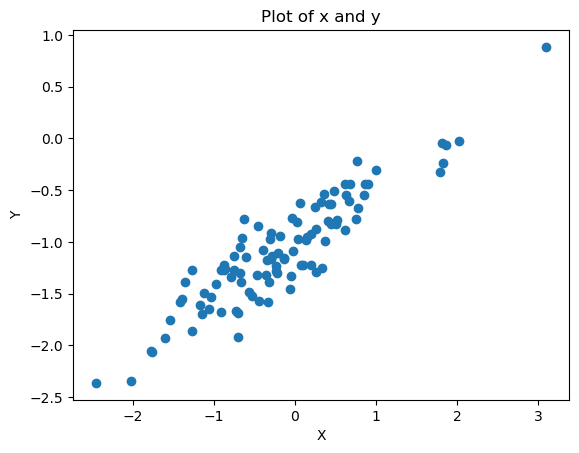

In [34]:
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of x and y')
plt.show()

(e) Fit a least squares linear model to predict y using x. Comment
on the model obtained. How do ˆ #0 and ˆ #1 compare to #0 and
#1?


In [35]:
x_new = sm.add_constant(x)
modelnew = sm.OLS(y, x_new)
results = modelnew.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     476.8
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.99e-39
Time:                        19:34:35   Log-Likelihood:                 10.978
No. Observations:                 100   AIC:                            -17.96
Df Residuals:                      98   BIC:                            -12.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0012      0.022    -45.018      0.0

The coefficients are pretty close to the actual coefficients, -1, .5

(f) Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a different
color. Use the legend() method of the axes to create an appropriate
legend.

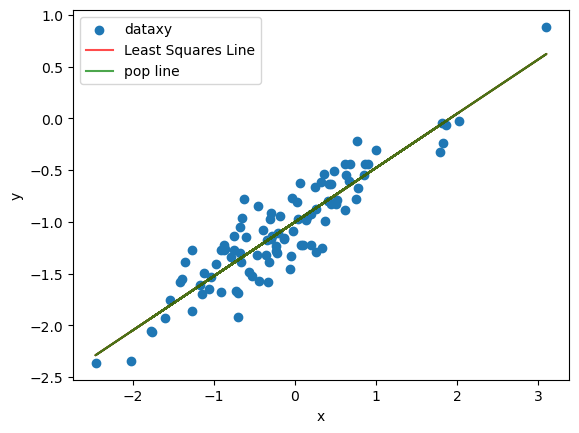

In [36]:
coefficients = np.polyfit(x, y, 1)
least_sqaures_line = np.poly1d(coefficients)

population_line = np.poly1d(np.polyfit(x, y, 1, cov=False))

plt.scatter(x, y, label = 'dataxy')

plt.plot(x, least_sqaures_line(x), color='red', label='Least Squares Line', zorder=2, alpha=0.7)

plt.plot(x, population_line(x), color='green', label='pop line', alpha=0.7)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

(g) Now fit a polynomial regression model that predicts y using x
and x2. Is there evidence that the quadratic term improves the
model fit? Explain your answer.

In [37]:
x_poly = sm.add_constant(np.column_stack((x, x**2)))
poly_model = sm.OLS(y, x_poly)
results = poly_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     236.1
Date:                Wed, 22 May 2024   Prob (F-statistic):           5.32e-38
Time:                        19:34:41   Log-Likelihood:                 11.008
No. Observations:                 100   AIC:                            -16.02
Df Residuals:                      97   BIC:                            -8.201
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0045      0.026    -38.248      0.0

(h) Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance
of the normal distribution used to generate the error term
 in (b). Describe your results.

In [38]:
random.seed(1)
x = rng.normal(loc=0, scale=1, size=100)
esp = rng.normal(loc=0, scale=0.01, size=100)
y = -1 + (0.5*x) + esp

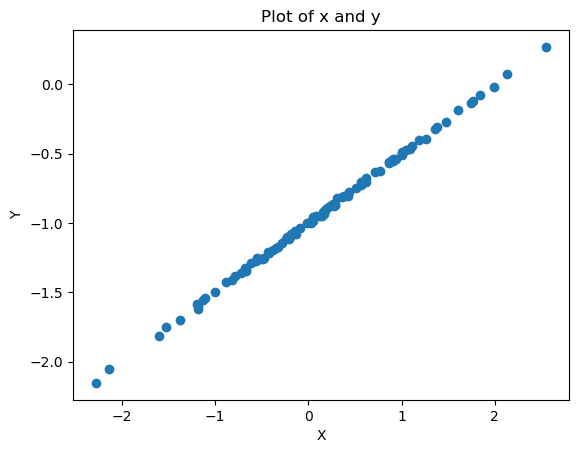

In [39]:
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of x and y')
plt.show()

In [38]:
x_v = sm.add_constant(x)
modelv = sm.OLS(y, x_v)
resultsv = modelv.fit()
print(resultsv.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.615e+05
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          1.81e-159
Time:                        21:11:33   Log-Likelihood:                 308.40
No. Observations:                 100   AIC:                            -612.8
Df Residuals:                      98   BIC:                            -607.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0007      0.001   -882.277      0.0

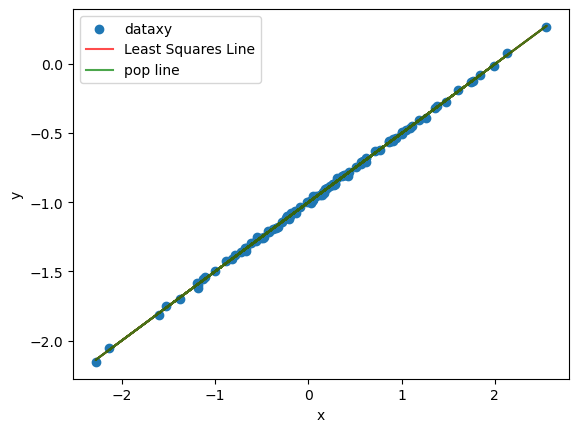

In [40]:
coefficients = np.polyfit(x, y, 1)
least_sqaures_line = np.poly1d(coefficients)

population_line = np.poly1d(np.polyfit(x, y, 1, cov=False))

plt.scatter(x, y, label = 'dataxy')

plt.plot(x, least_sqaures_line(x), color='red', label='Least Squares Line', zorder=2, alpha=0.7)

plt.plot(x, population_line(x), color='green', label='pop line', alpha=0.7)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

(i) Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term " in (b). Describe your results.

In [41]:
random.seed(1)
x = rng.normal(loc=0, scale=1, size=100)
esp = rng.normal(loc=0, scale=0.75, size=100)
y = -1 + (0.5*x) + esp

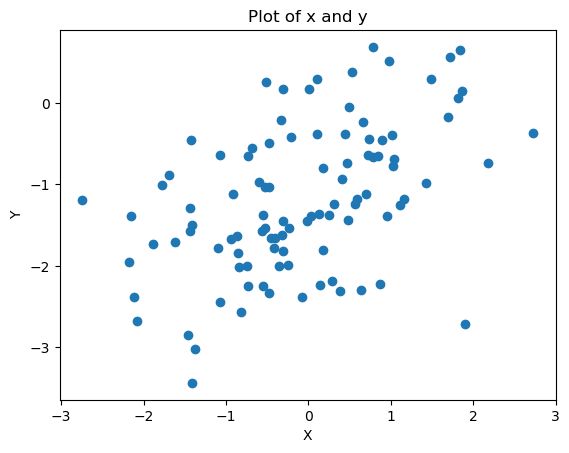

In [42]:
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of x and y')
plt.show()

In [43]:
x_n = sm.add_constant(x)
modeln = sm.OLS(y, x_n)
resultsn = modeln.fit()
print(resultsn.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     28.46
Date:                Wed, 22 May 2024   Prob (F-statistic):           6.15e-07
Time:                        19:34:55   Log-Likelihood:                -118.50
No. Observations:                 100   AIC:                             241.0
Df Residuals:                      98   BIC:                             246.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1531      0.080    -14.372      0.0

(j) What are the confidence intervals for #0 and #1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

In [44]:
random.seed(1)
rng = np.random.default_rng (10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The last line corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefficients? 3.7 Exercises 133

y = 2 + 2 * x1 _ 0.3 + e

coef = 2, 2, 0.3

(b) What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

Scatterplot is a positive correlation. 

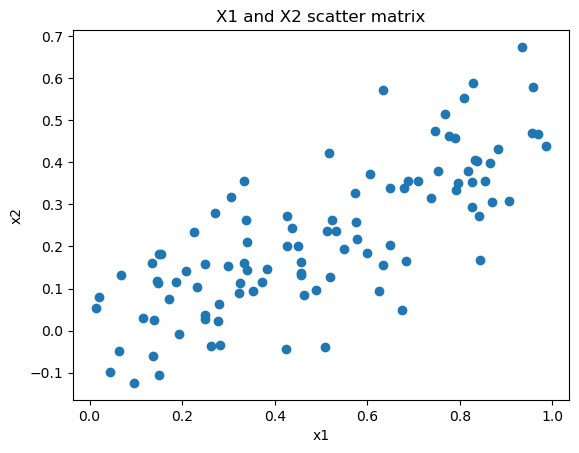

In [45]:
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('X1 and X2 scatter matrix')
plt.show()

(c) Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are ˆ #0, ˆ #1, and
ˆ #2? How do these relate to the true #0, #1, and #2? Can you
reject the null hypothesis H0 : #1 = 0? How about the null
hypothesis H0 : #2 = 0?

In [46]:
data = {'x1':x1, 'x2':x2, 'y':y}
df = pd.DataFrame(data)
x = sm.add_constant(df[['x1', 'x2']])
y = df['y']
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Wed, 22 May 2024   Prob (F-statistic):           5.76e-08
Time:                        19:35:02   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

The coefficients (estimated) are 1.9, 1.6, .9. It seems like x2 has the greatest coefficient different from the actual x2 coefficient. It is also noted that the p value for x2 is large, not rejecting the null. 

x1 also rejects the null based on a .05 standard. 

(d) Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
H0 : #1 = 0?

In [46]:
x = sm.add_constant(x1)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.37e-08
Time:                        21:11:40   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

The value of p has dropped as a result of excluding x2, and the magnitude of the coefficient has increased. 

(e) Now fit a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
H0 : #1 = 0?

In [47]:
x = sm.add_constant(x2)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           7.43e-07
Time:                        21:11:41   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

(f) Do the results obtained in (c)–(e) contradict each other? Explain
your answer.

Here it suggests that X2 alone has a p value indicating it rejects the null, with x1 also rejecting the null. This suggests there may be some multi-collinearity.

(g) Suppose we obtain one additional observation, which was unfortunately
mismeasured. We use the function np.concatenate() to np.concaadd
this additional observation to each of x1, x2 and y.

Re-fit the linear models from (c) to (e) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

In [48]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [49]:
data = {'x1':x1, 'x2':x2, 'y':y}
df = pd.DataFrame(data)
x = sm.add_constant(df[['x1', 'x2']])
y = df['y']
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           4.60e-08
Time:                        21:11:43   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.0

(g) Suppose we obtain one additional observation, which was unfortunately
mismeasured. We use the function np.concatenate() to np.concaadd
this additional observation to each of x1, x2 and y. tenate()
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

Re-fit the linear models from (c) to (e) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

In [50]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [51]:
data = {'x1':x1, 'x2':x2, 'y':y}
df = pd.DataFrame(data)
x = sm.add_constant(df[['x1', 'x2']])
y = df['y']
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     22.92
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           6.60e-09
Time:                        21:11:45   Log-Likelihood:                -137.93
No. Observations:                 102   AIC:                             281.9
Df Residuals:                      99   BIC:                             289.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1121      0.193     10.952      0.0

15. This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

(a) For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions

In [47]:
data = load_data('Boston')
y = data['crim']
x1 = data['zn']
x2 = data['indus']
x3 = data['chas']
x4 = data['nox']
x5 = data['rm']
x6 = data['age']
x7 = data['dis']
x8 = data['rad']
x9 = data['tax']
x10 = data['ptratio']
x11 = data['lstat']
x12 = data['medv']
model1 = sm.OLS(y, x1)
model2 = sm.OLS(y, x2)
model3 = sm.OLS(y, x3)
model4 = sm.OLS(y, x4)
model5 = sm.OLS(y, x5)
model6 = sm.OLS(y, x6)
model7 = sm.OLS(y, x7)
model8 = sm.OLS(y, x8)
model9 = sm.OLS(y, x9)
model10 = sm.OLS(y, x10)
model11 = sm.OLS(y, x11)
model12 = sm.OLS(y, x12)
results1 = model1.fit()
results2 = model2.fit()
results3 = model3.fit()
results4 = model4.fit()
results5 = model5.fit()
results6 = model6.fit()
results7 = model7.fit()
results8 = model8.fit()
results9 = model9.fit()
results10 = model10.fit()
results11 = model11.fit()
results12 = model12.fit()
print(results1.summary())
print(results2.summary())
print(results3.summary())
print(results4.summary())
print(results5.summary())
print(results6.summary())
print(results7.summary())
print(results8.summary())
print(results9.summary())
print(results10.summary())
print(results11.summary())
print(results12.summary())

                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                           0.007420
Date:                Wed, 22 May 2024   Prob (F-statistic):                       0.931
Time:                        19:35:10   Log-Likelihood:                         -1847.6
No. Observations:                 506   AIC:                                      3697.
Df Residuals:                     505   BIC:                                      3701.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

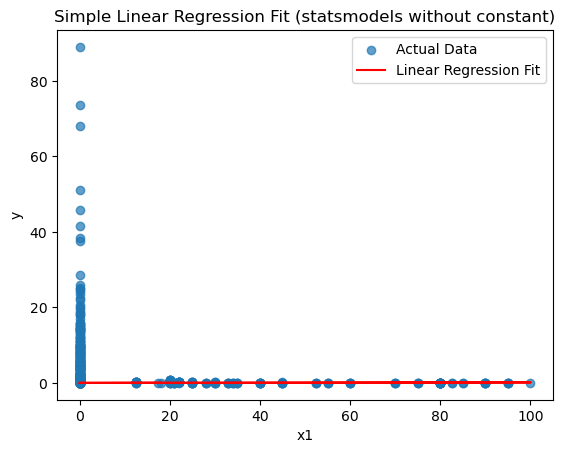

In [48]:
# Plot the data points
plt.scatter(x1, y, alpha=0.7, label='Actual Data')

# Plot the linear regression line
plt.plot(x1, results1.predict(x1), color='red', label='Linear Regression Fit')

# Customize the plot
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Simple Linear Regression Fit (statsmodels without constant)')
plt.legend()
plt.show()

In [71]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


(b) Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : #j = 0?

In [51]:
terms = data.columns.drop('crim')

X = MS(terms).fit_transform(data)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


(c) How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

It appears that 5 variables are presented as significant in the multiple regression model, with a greater number of variables presenting as significant in the univariate model. This suggests possible correlations among the variables. 

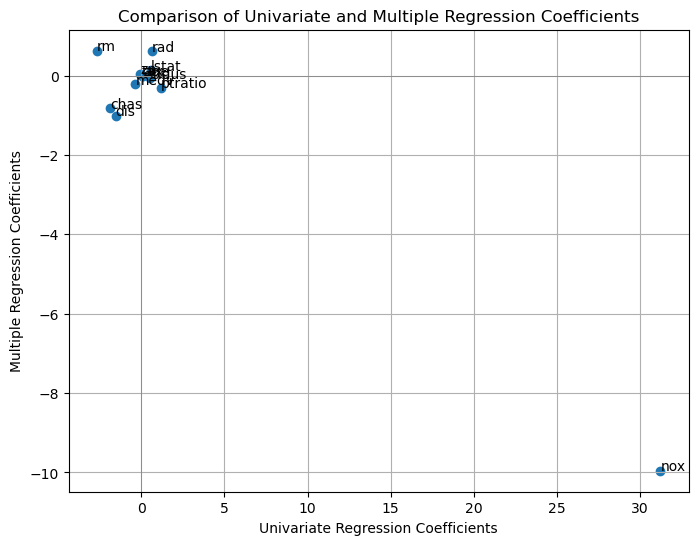

In [53]:
y = data['crim']

predictors = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

univariate_coefficients = {}

for predictor in predictors:
    X = sm.add_constant(data[predictor])  
    model = sm.OLS(y, X)
    results = model.fit()
    univariate_coefficients[predictor] = results.params[predictor]  


X = sm.add_constant(data[predictors])  
model = sm.OLS(y, X)
results = model.fit()


multiple_coefficients = results.params.drop('const')  


coefficients_df = pd.DataFrame({
    'univariate': univariate_coefficients,
    'multiple': multiple_coefficients
})


plt.figure(figsize=(8, 6))
plt.scatter(coefficients_df['univariate'], coefficients_df['multiple'])


for predictor in coefficients_df.index:
    plt.text(coefficients_df['univariate'][predictor], coefficients_df['multiple'][predictor], predictor)

plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.title('Comparison of Univariate and Multiple Regression Coefficients')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True)


plt.show()

In [ ]:
(d) Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form
Y = #0 + #1X + #2X2 + #3X3 + ".

Considering the output below (didnt include all variables) there is evidence of some nonlinearity, especially in regards to age. 

In [55]:
X = MS(['zn', poly('lstat', degree=2), poly('age', degree=3)]).fit_transform(data)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,3.7137,0.396,9.370,0.000
zn,-0.0088,0.019,-0.470,0.638
"poly(lstat, degree=2)[0]",61.0012,10.028,6.083,0.000
"poly(lstat, degree=2)[1]",17.0531,8.065,2.114,0.035
"poly(age, degree=3)[0]",32.1708,10.636,3.025,0.003
"poly(age, degree=3)[1]",22.0260,7.969,2.764,0.006
"poly(age, degree=3)[2]",14.5678,7.922,1.839,0.067
